### 전처리(Pre-Processing)  
(1) 빅데이터의 가공  
(2) Binning / Normalization  
(3) Data Formatting  

### 빅데이터의 가공
(1) Missing Values(존재하지 않는 값) 처리
- 찾아서 복구하는 법
- 해당 라인을 삭제하는 법
- 해당 칼럼이 중요하지 않다면 삭제하는 방법
- 해당 값을 다른 값들의 평균을 구해 입력하는 방법(헤딩 값이 수치값이 아닌 겨우(색상, 종류 등)는 빈도수가 가장 많은 것을 선택)

In [48]:
# 열을 삭제하는 방법

import pandas as pd
import numpy as np
from numpy import NaN

data = pd.DataFrame(np.arange(12).reshape(3,4), columns=['A','B','C','D'])
data.D[2] = NaN
data

,A,B,C,D
0,0,1,2,3.0
1,4,5,6,7.0
2,8,9,10,NaN


In [49]:
# data.drop(['D'], axis=1)
# 유의사항
# print(data)
data = data.drop(['D'], axis=1)
data

,A,B,C
0,0,1,2
1,4,5,6
2,8,9,10


In [50]:
import pandas as pd
from numpy import NaN
robots = [[24,23680], [35, NaN], [46, 47350], [27, NaN]]
data = pd.DataFrame(robots, columns=['max_speed', 'price'])
print(data)

   max_speed    price
0         24  23680.0
1         35      NaN
2         46  47350.0
3         27      NaN


In [10]:
# axis=0 은 행을 삭제하는 옵션
# inplace=True 는 해당 데이터셋 자체를 수정하라는 의미
data.dropna(subset=['price'], axis=0, inplace=True)
print(data)

   max_speed    price
0         24  23680.0
2         46  47350.0


In [51]:
# 값들의 평균을 구해 NaN을 대체하는 방법
import pandas as pd
from numpy import NaN
robots = [[24, 23680], [35, NaN], [46, 47350], [27, NaN]]
data = pd.DataFrame(robots, columns=['max_speed', 'price'])

mean = data['price'].mean()
data.replace(NaN, mean, inplace=True)
print(data)

   max_speed    price
0         24  23680.0
1         35  35515.0
2         46  47350.0
3         27  35515.0


#### binning

(array([  0.,   0.,   1.,   1.,   5.,  14.,  34., 106., 141., 215., 193.,
        129.,  93.,  38.,  20.,   5.,   5.,   0.,   0.,   0.]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

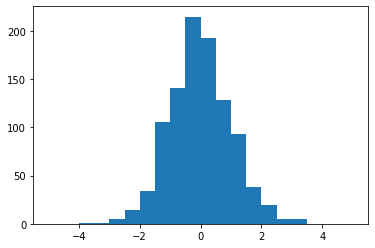

In [53]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(1000)
plt.hist(x, bins=np.linspace(-5,5,21))

#### Normalization

**1. Simple Feature Scaling**  
X = X / MAX

**2. Min-Max(최대-최소) 정규화**  
X = X – MIN / MAX – MIN

**3. Z-score(Z-점수) 정규화**  
X = X – 평균 / 표준편차


In [61]:
import pandas as pd
import numpy as np
ary = [[1,2], [3,4], [5,6], [7,8],[9,10]]
data = pd.DataFrame(ary, columns=['수온', '상온'])
data

,수온,상온
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10


In [60]:
#Simple Feature Scaling
data['수온']=data['수온']/data['수온'].max()
data['상온']=data['상온']/data['상온'].max()
data

,수온,상온
0,0.111111,0.2
1,0.333333,0.4
2,0.555556,0.6
3,0.777778,0.8
4,1.000000,1.0


In [62]:
data['수온'] = (data['수온']-data['수온'].min())/(data['수온'].max()-data['수온'].min())
data['상온'] = (data['상온']-data['상온'].min())/(data['상온'].max()-data['상온'].min())
data

,수온,상온
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


#### Data Formatting
(1) 수치값을 카테고리값으로 변환하기  
(2) 카테고리값을 수치값으로 변환하기

In [63]:
# 수치값을 카테고리값으로 변환하기
import numpy as np
import pandas as pd
price = np.random.randint(100, size=8)*10000
print(price)
cars = pd.DataFrame(price, columns=['price'])
cars

[630000 420000 320000 350000 910000 570000  30000 940000]


,price
0,630000
1,420000
2,320000
3,350000
4,910000
5,570000
6,30000
7,940000


In [65]:
import numpy as np
import pandas as pd
price = np.random.randint(100, size=8)*10000
cars = pd.DataFrame(price, columns=['price'])

group_names = ['저급', '중급', '고급']
cars['Level'], mybin = pd.cut(cars['price'], 3, labels=group_names, retbins=True)
# cars['Level'], mybin = pd.qcut(cars['price'], 3, labels=group_names, retbins=True)
print(mybin)
cars

[ 10000.         243333.33333333 470000.         960000.        ]


,price,Level
0,910000,고급
1,960000,고급
2,370000,중급
3,270000,중급
4,10000,저급
5,20000,저급
6,520000,고급
7,230000,저급


In [67]:
# 카테고리값을 수치값으로 변환하기
import pandas as pd
import numpy as np
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])
# print(data)
print(pd.get_dummies(data['hand']))

   날개  손
0   0  1
1   1  0
2   0  1


In [68]:
import pandas as pd
import numpy as np
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])

data = pd.concat([data, pd.get_dummies(data['hand'])], axis=1, sort=False)
data

,수온,상온,hand,날개,손
0,1,1.1,손,0,1
1,2,2.2,날개,1,0
2,3,3.3,손,0,1


In [69]:
import pandas as pd
import numpy as np
ary = [[1, 1.1, '손'], [2, 2.2, '날개'], [3, 3.3, '손']]
data = pd.DataFrame(ary, columns=['수온', '상온', 'hand'])

data = pd.concat([data, pd.get_dummies(data['hand'])], axis=1, sort=False)
data.drop(['hand'], axis=1, inplace=True)
data

,수온,상온,날개,손
0,1,1.1,0,1
1,2,2.2,1,0
2,3,3.3,0,1
